# Example

Usually the required libraries are imported first:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Download sample data

Then we download the sample data. We can use shell commands within iPython for this by prefixing ``!``. The following command fetches a .csv file to your current working directory:

In [2]:
!curl -O https://s3.amazonaws.com/dq-blog-files/fortune500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  861k  100  861k    0     0   766k      0  0:00:01  0:00:01 --:--:--  768k


## Read in sample data

Then we read the csv data into pandas as a DataFrame:

In [3]:
df = pd.read_csv('fortune500.csv')

## Examine data

[pandas.DataFrame.head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas-dataframe-head) returns the first rows for the object based on the position.

In [4]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


[pandas.DataFrame.tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas-dataframe-tail) returns the last rows from the object based on the position.

In [5]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


### Renaming the columns

The columns can be renamed with [pandas.DataFrame.columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas-dataframe-columns). This will make it easier for us to refer to the columns later. Afterwards we check the change with `df.head()`:

In [6]:
df.columns = ["year", "rank", "company", "revenue", "profit"]
df.head()

,year,rank,company,revenue,profit
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


### Check the number of records

The function [len()](https://docs.python.org/3/library/functions.html#len) returns the number of items of an object.

In [7]:
len(df)

25500

This corresponds to 500 lines per year from 1955 up to 2005.

### Check the data types

The function [pandas.dataframe.dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html#pandas-dataframe-dtypes) returns the data types in the DataFrame.

In [8]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

The column `profit` should be of the data type `float64`; that is not the case here. This indicates that the column is likely to have some values that are not numbers. Let's check this with a regular expression:

In [9]:
non_numeric_profits = df.profit.str.contains("[^0-9.-]")

df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


We also check whether there are other non-numerical values besides `N.A.`:

In [10]:
set(df.profit[non_numeric_profits])

{'N.A.'}

Next, let’s examine how many records are affected:

In [11]:
len(df.profit[non_numeric_profits])

369

… and how they are distributed over the years:

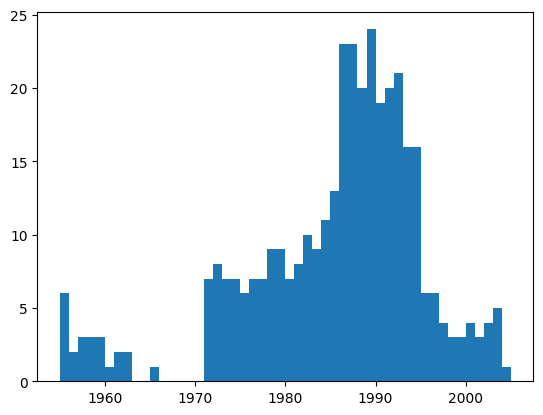

In [12]:
bin_sizes, _, _ = plt.hist(
    df.year[non_numeric_profits], bins=range(1955, 2006)
)

Here we can see that the problematic data points will not exceed 24 in a year, and with 500 data points per year, removing these values would be less than 5% of the data for that year. Let’s assume that it is acceptable to us that the problematic data can be removed:

In [13]:
df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

We should now have `25500 - 369` records:

In [14]:
len(df)

25131

… and for the column `profit` the data type should now be `float64`:

In [15]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object